# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [137]:
df_complete = pd.read_csv('../data/states_edu.csv')
df_complete.columns
df_complete.head()
df_complete[::1]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [138]:
df_complete.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4G',
    'GRADES_8_G':'ENROLL_8G',
    'GRADES_12_G':'ENROLL_12G',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
},
axis=1, inplace=True)

df.columns
np.nan

df_clean = df.dropna()
df_clean.count()

PRIMARY_KEY                     355
STATE                           355
YEAR                            355
ENROLL_ALL_EST                  355
TOTAL_REVENUE                   355
FEDERAL_REVENUE                 355
STATE_REVENUE                   355
LOCAL_REVENUE                   355
TOTAL_EXPENDITURE               355
INSTRUCTION_EXPENDITURE         355
SUPPORT_SERVICES_EXPENDITURE    355
OTHER_EXPENDITURE               355
CAPITAL_OUTLAY_EXPENDITURE      355
ENROLL_PREK                     355
ENROLL_KINDER                   355
ENROLL_4G                       355
ENROLL_8G                       355
ENROLL_12G                      355
ENROLL_PRIMARY                  355
ENROLL_HS                       355
ENROLL_ALL                      355
AVG_MATH_4_SCORE                355
AVG_MATH_8_SCORE                355
AVG_READING_4_SCORE             355
AVG_READING_8_SCORE             355
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [139]:
num_years = df_complete['YEAR'].nunique()
num_years_clean = df_clean['YEAR'].nunique()
print(f'There are {num_years} years of data logged in the dataset\nThere are {num_years_clean} years of data logged in the cleaned dataset')

There are 33 years of data logged in the dataset
There are 7 years of data logged in the cleaned dataset


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [140]:
df_states = df_complete.set_index('STATE')
ohioAvg = df_states.loc['OHIO']['AVG_MATH_4_SCORE'].mean()
michiganAvg = df_states.loc['MICHIGAN']['AVG_MATH_4_SCORE'].mean()

if (ohioAvg< michiganAvg):
    print(f"ohio's average of {round(ohioAvg, 3)} is greater than Michigan's")
else:
    print(f"Michigan's average of {round(michiganAvg, 3)} is greater than Ohio's")

Michigan's average of 234.364 is greater than Ohio's


Find the average for your chosen test across all states in 2019

In [141]:
group_year = df_complete.groupby(["YEAR"])['AVG_MATH_4_SCORE'].mean()
print(f'The average 4th grade math test score across all states is {round(group_year[2019], 3)}')


The average 4th grade math test score across all states is 239.943


For each state, find a maximum value for your chosen test score

In [142]:
group_state_max = df_complete.groupby("STATE")["AVG_MATH_4_SCORE"].max()
group_state_max

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [143]:
df_complete["EXPENDITURE_PER_STUDENT"] = df_complete['SUPPORT_SERVICES_EXPENDITURE'] / df_complete['ENROLL_ALL_EST']
df_complete[::1]

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8G,ENROLL_12G,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN


Feature engineering justification: **<Using the average 4th grade math score as the response variable and the total expenditure per student as the explanatory variable, if results are statistically significant, a relationship between the total expenditure per student and 4th grade math scores could be concluded>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

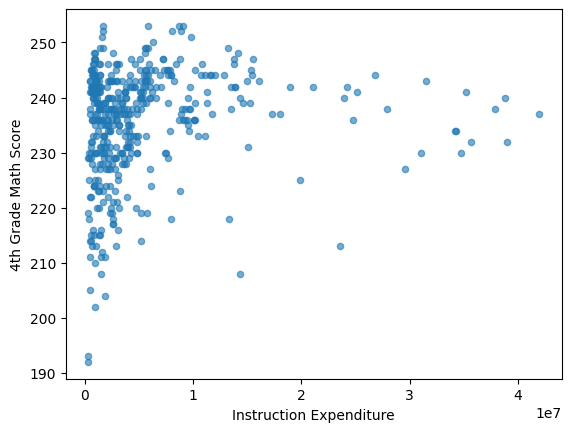

In [144]:
df_complete.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure')
plt.ylabel('4th Grade Math Score')

**<The scatter plot does not show any apparent relationship between instruction expenditure and the average 4th grade math score>**

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

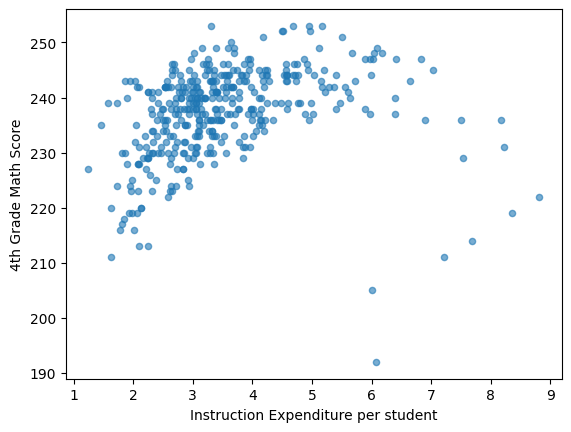

In [145]:
df_complete.plot.scatter(x='EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure per student')
plt.ylabel('4th Grade Math Score')

**<The scatter plot shows a weak, logarithmic relationship between the instruction expenditure per student and the average 4th grade math score of a given state>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X = df_complete[['ENROLL_4G','TOTAL_EXPENDITURE','TOTAL_REVENUE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
 

In [148]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [149]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [150]:
# create your model here
model = LinearRegression()

In [151]:
y.fillna(y.median(), inplace=True)
model.fit(X_train, y_train)

LinearRegression()

In [152]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [153]:
print(model.score(X_test, y_test))


0.029172207436385378


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

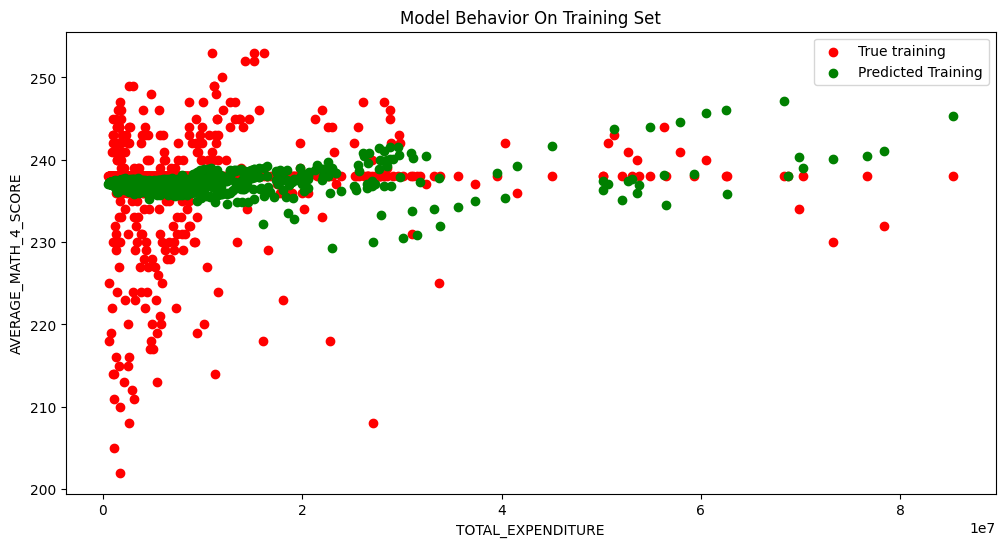

In [155]:
col_name = 'TOTAL_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVERAGE_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

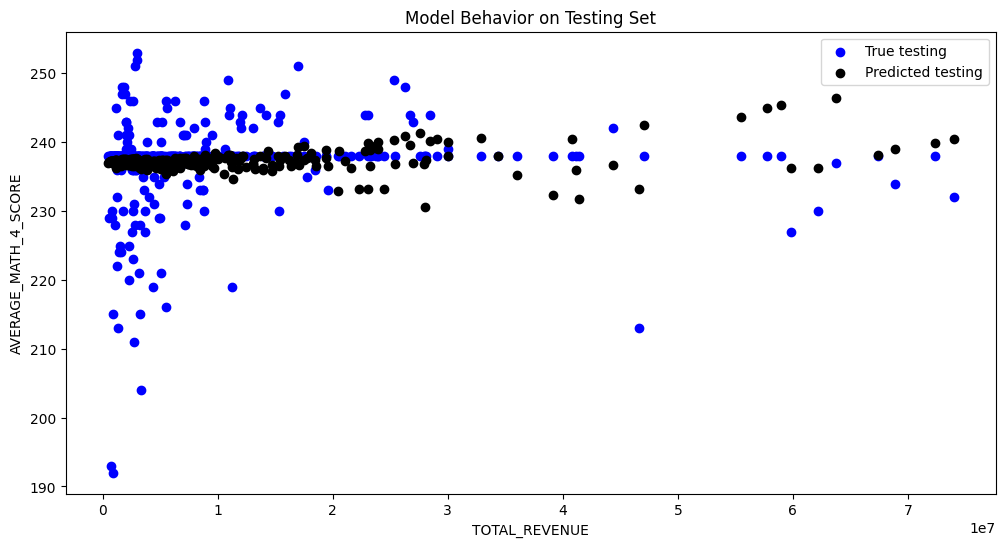

In [157]:
col_name = "TOTAL_REVENUE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVERAGE_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")